In [54]:
# Загрузка набора данных breast cancer wisconsin
data = load_breast_cancer()

# Входные данные
X = data.data
# Выходные данные (целевая переменная)
Y = data.target

# Нормализация данных
X_normalized = X - X.mean(axis=0)

# Вывод нормализованных данных
print("Нормализованные данные:")
print(X_normalized)

Нормализованные данные:
[[ 3.86270826e+00 -8.90964851e+00  3.08309666e+01 ...  1.50793777e-01
   1.70024429e-01  3.49541828e-02]
 [ 6.44270826e+00 -1.51964851e+00  4.09309666e+01 ...  7.13937768e-02
  -1.50755712e-02  5.07418278e-03]
 [ 5.56270826e+00  1.96035149e+00  3.80309666e+01 ...  1.28393777e-01
   7.12244288e-02  3.63418278e-03]
 ...
 [ 2.47270826e+00  8.79035149e+00  1.63309666e+01 ...  2.71937768e-02
  -6.82755712e-02 -5.74581722e-03]
 [ 6.47270826e+00  1.00403515e+01  4.81309666e+01 ...  1.50393777e-01
   1.18624429e-01  4.00541828e-02]
 [-6.36729174e+00  5.25035149e+00 -4.40490334e+01 ... -1.14606223e-01
  -2.97557118e-03 -1.35558172e-02]]


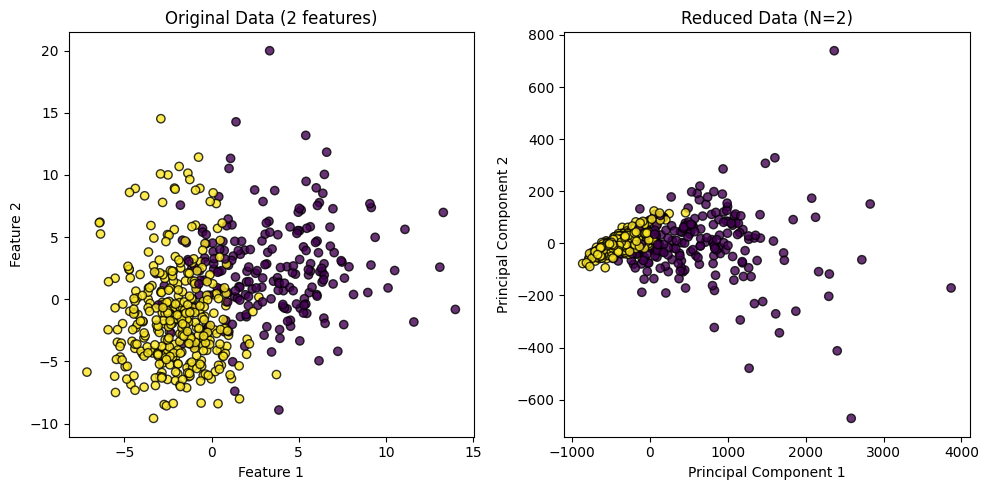

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

def pca_custom(data, N):
    # Шаг 1: Нормализация данных
    normalized_data = data - data.mean(axis=0)

    # Шаг 2: Построение матрицы ковариации
    covariance_matrix = np.cov(normalized_data, rowvar=False)

    # Шаг 3: Диагонализация матрицы
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Шаг 4: Сортировка векторов
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Шаг 5: Выбор N главных компонент
    selected_eigenvectors = sorted_eigenvectors[:, :N]

    # Шаг 6: Модификация исходных данных
    reduced_data = np.dot(normalized_data, selected_eigenvectors)

    # Шаг 7: Возвращение данных сниженной размерности
    return reduced_data

# Загрузка набора данных breast cancer wisconsin
data = load_breast_cancer()

# Входные данные
X = data.data

# Нормализация данных
X_normalized = X - X.mean(axis=0)

# Применение PCA для снижения размерности до 2 компонент
N_components = 2
reduced_data = pca_custom(X_normalized, N_components)

# Визуализация исходных данных и сниженной размерности
plt.figure(figsize=(10, 5))

# Исходные данные
plt.subplot(121)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('Original Data (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Сниженная размерность
plt.subplot(122)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title(f'Reduced Data (N={N_components})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


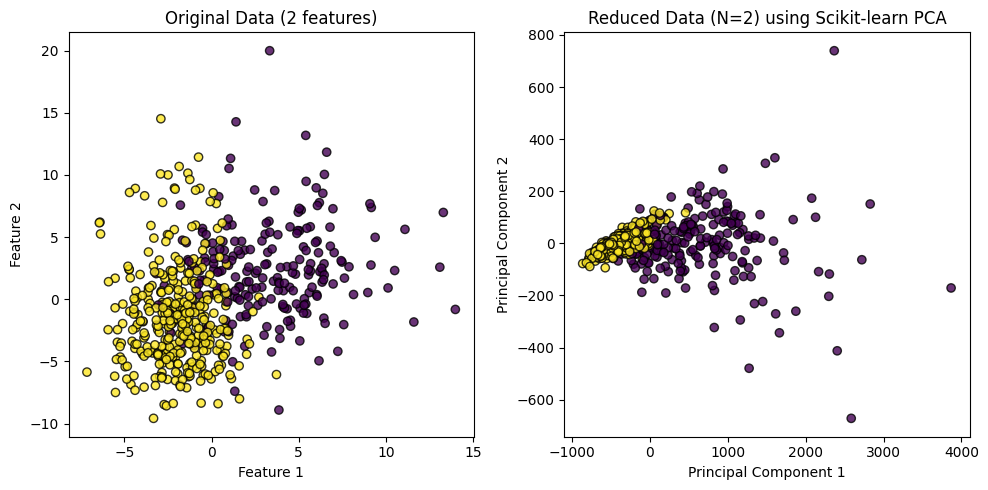

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Загрузка набора данных breast cancer wisconsin
data = load_breast_cancer()

# Входные данные
X = data.data

# Нормализация данных
X_normalized = X - X.mean(axis=0)

# Применение встроенной реализации PCA для снижения размерности до 2 компонент
N_components = 2
pca = PCA(n_components=N_components)
reduced_data_sklearn = pca.fit_transform(X_normalized)

# Визуализация исходных данных и сниженной размерности с использованием Scikit-learn
plt.figure(figsize=(10, 5))

# Исходные данные
plt.subplot(121)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('Original Data (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Сниженная размерность
plt.subplot(122)
plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title(f'Reduced Data (N={N_components}) using Scikit-learn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


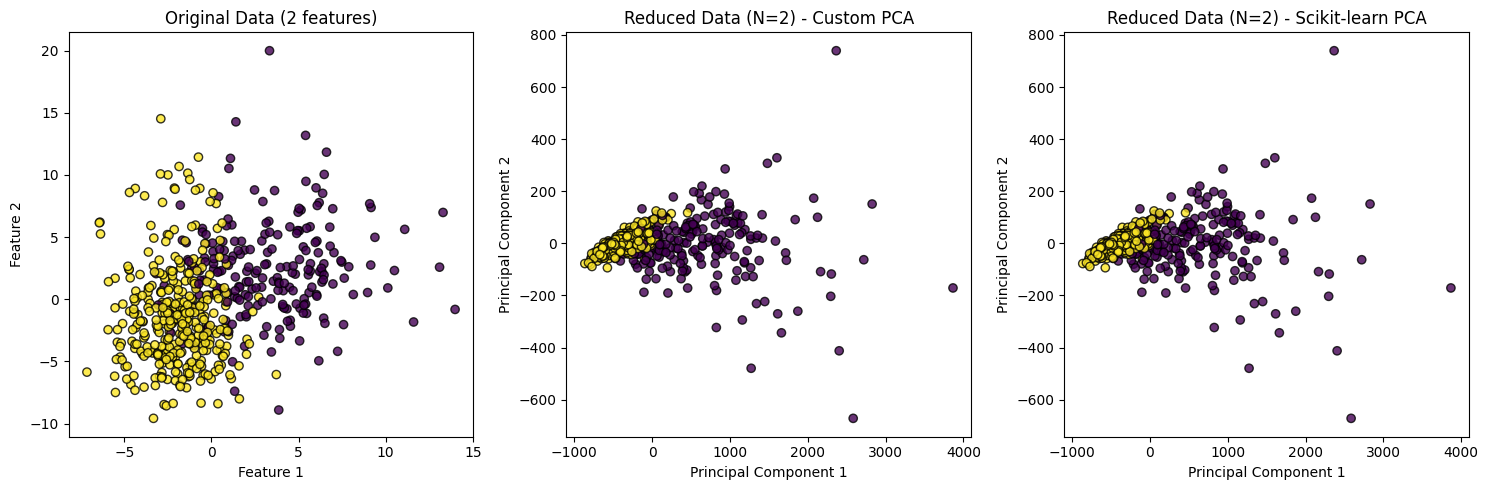

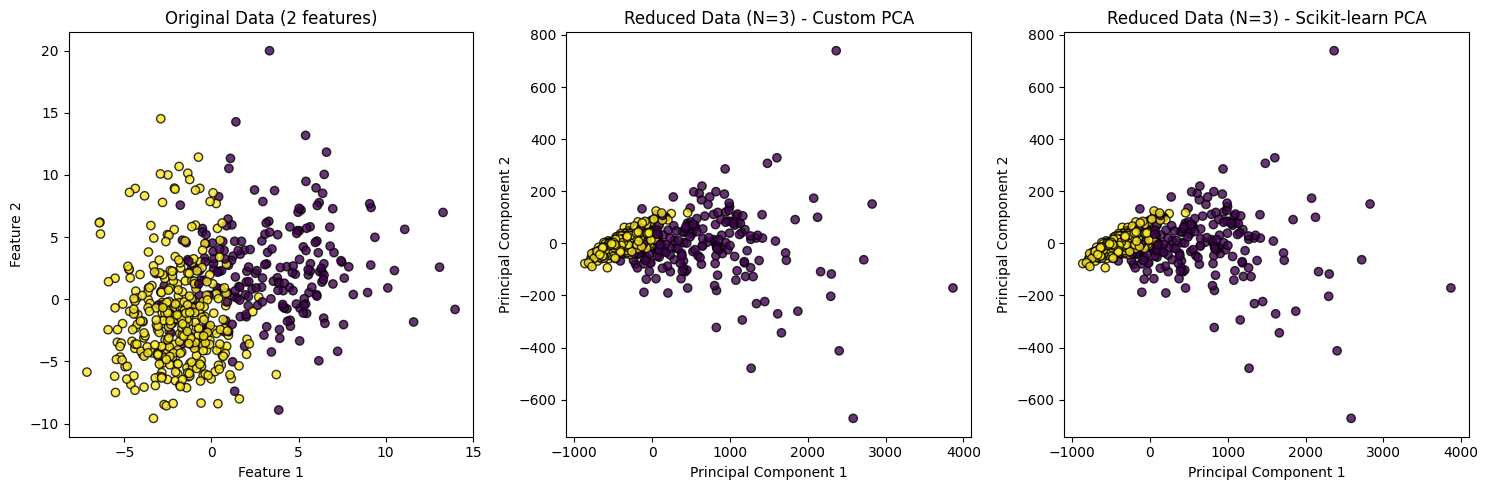

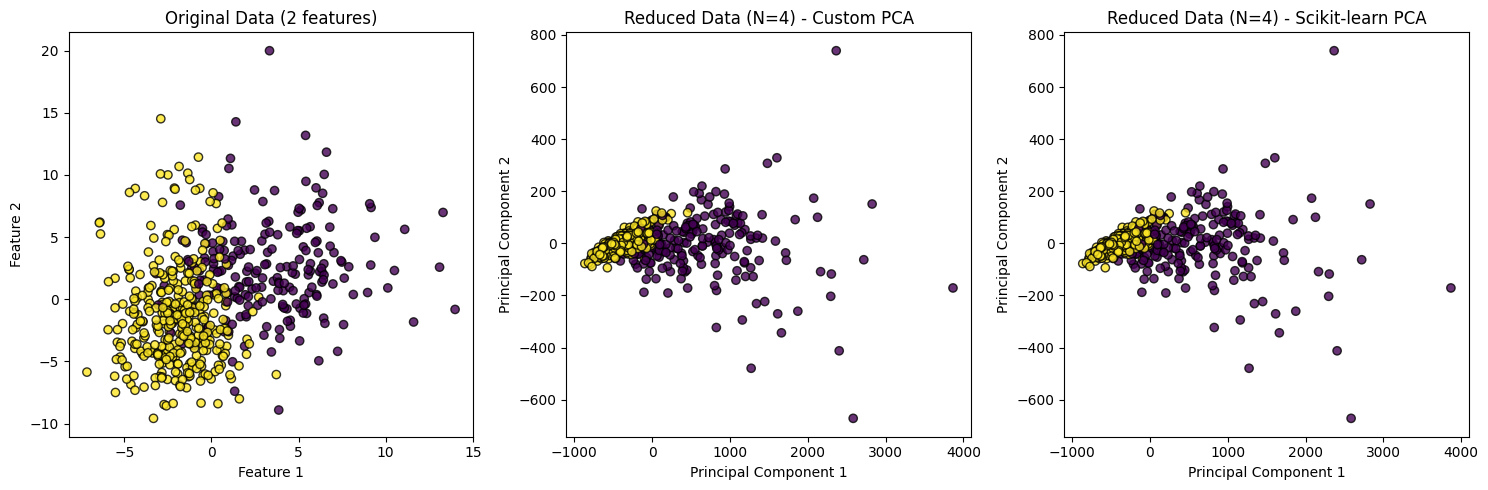

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

def pca_custom(data, N):
    # Шаг 1: Нормализация данных
    normalized_data = data - data.mean(axis=0)

    # Шаг 2: Построение матрицы ковариации
    covariance_matrix = np.cov(normalized_data, rowvar=False)

    # Шаг 3: Диагонализация матрицы
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Шаг 4: Сортировка векторов
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Шаг 5: Выбор N главных компонент
    selected_eigenvectors = sorted_eigenvectors[:, :N]

    # Шаг 6: Модификация исходных данных
    reduced_data = np.dot(normalized_data, selected_eigenvectors)

    # Шаг 7: Возвращение данных сниженной размерности
    return reduced_data

# Загрузка набора данных breast cancer wisconsin
data = load_breast_cancer()

# Входные данные
X = data.data

# Нормализация данных
X_normalized = X - X.mean(axis=0)

# Количество главных компонент
N_components_list = [2, 3, 4]

# Визуализация для каждого значения N_components
for N_components in N_components_list:
    # Ваша реализация PCA
    reduced_data_custom = pca_custom(X_normalized, N_components)

    # Использование Scikit-learn PCA
    pca_sklearn = PCA(n_components=N_components)
    reduced_data_sklearn = pca_sklearn.fit_transform(X_normalized)

    # Визуализация результатов
    plt.figure(figsize=(15, 5))

    # Исходные данные
    plt.subplot(131)
    plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
    plt.title('Original Data (2 features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Сниженная размерность (вручную)
    plt.subplot(132)
    plt.scatter(reduced_data_custom[:, 0], reduced_data_custom[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
    plt.title(f'Reduced Data (N={N_components}) - Custom PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Сниженная размерность (Scikit-learn)
    plt.subplot(133)
    plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=data.target, cmap='viridis', edgecolors='k', alpha=0.8)
    plt.title(f'Reduced Data (N={N_components}) - Scikit-learn PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.tight_layout()
    plt.show()
